In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

encode emotion to number first

In [2]:
baseline=pd.read_csv('baseline_clean_df.csv')
log=pd.read_csv('logistic_regression_trained_on_outside.csv')

In [26]:
def get_first(x):
    return x.split("'")[1]

In [27]:
def encoder(x):
    if x.lower()=='joy':
        return 0
    elif x.lower()=='sad':
        return 1
    elif x.lower()=='surprise':
        return 2
    elif x.lower()=='fear':
        return 3
    elif x.lower=='disgust':
        return 4
    else:
        return 5
    

In [28]:
baseline['emotion']=baseline['Emotion'].apply(get_first)

In [29]:
baseline['emotion_cluster']=baseline['emotion'].apply(encoder)
log['emotion_cluster']=log['predict'].apply(encoder)

dimension reduction

In [30]:
numls=['scene_avg_p', 'scene_avg_a', 'scene_avg_d',
       'scene_avg_blur', 'scene_avg_optical_flow']

In [52]:
tsne=TSNE(n_components=2, random_state=0, perplexity=5)

In [53]:
redubase=pd.DataFrame(tsne.fit_transform(baseline[numls].fillna(0)))

In [54]:
redubase['cluster']=baseline['emotion_cluster']

Text(0, 0.5, 'component 1')

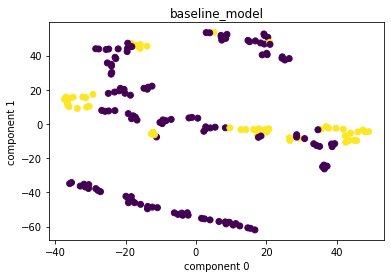

In [55]:
plt.scatter(redubase[0], redubase[1], c=redubase['cluster'])
plt.title('baseline_model')
plt.xlabel('component 0')
plt.ylabel('component 1')

In [56]:
redulog=pd.DataFrame(tsne.fit_transform(log[numls].fillna(0)))
redulog['cluster']=log['emotion_cluster']

Text(0, 0.5, 'component 1')

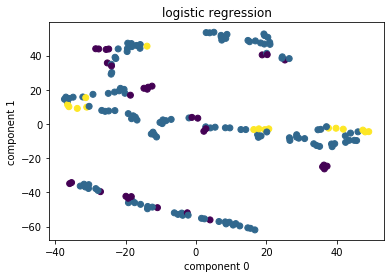

In [57]:
plt.scatter(redulog[0], redulog[1], c=redulog['cluster'])
plt.title('logistic regression')
plt.xlabel('component 0')
plt.ylabel('component 1')